In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta,time

In [2]:
address = pd.read_csv('address_data.csv') 
customers = pd.read_csv('customers_data.csv') 
ingredients = pd.read_csv('ingredients_data.csv') 
inventory = pd.read_csv('inventory_data.csv') 
item = pd.read_csv('item_data.csv')
orders = pd.read_csv('orders_data.csv')
recipe = pd.read_csv('recipe_data.csv') 
rota = pd.read_csv('rota_data.csv')  
shift = pd.read_csv('shift_data.csv') 
staff = pd.read_csv('staff_data.csv')

# Pizzeria Data Analysis
## relevant information we seek to extract from the data
### ⦾ Sales and customers
#### • Who are the most frequent customers and how much do they spend?
#### • What are the best-selling products and how much money did they generate?
#### • Which products are usually purchased together?
### ⦾ inventory and recipes
#### • Which items have the highest stock and which ones need to be resupplied?
#### • What are the most commonly used ingredients in the recipes and what is the cost of these as a proportion of the value of the product?
### ⦾ Staff performance
#### • How does staff performance vary on different days of the week and shifts?
#### • What are the total and average labor costs per shift?
### ⦾ Pizzeria profitability
#### • Total income in the pizzeria 
#### • Daily, weekly and total profits



# 

## Data Wrangling

In [3]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   add_id             113 non-null    int64 
 1   delivery_address1  113 non-null    object
 2   delivery_address2  34 non-null     object
 3   delivery_city      113 non-null    object
 4   delivery_postcode  113 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.5+ KB


In [4]:
address = address.drop('delivery_address2',axis=1)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         117 non-null    float64
 1   cust_firstname  117 non-null    object 
 2   cust_lastname   117 non-null    object 
 3   Unnamed: 3      0 non-null      float64
 4   Unnamed: 4      0 non-null      float64
 5   Unnamed: 5      0 non-null      float64
 6   Unnamed: 6      0 non-null      float64
 7   Unnamed: 7      0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 8.8+ KB


In [6]:
customers = customers.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'],axis=1)

In [7]:
customers = customers.dropna()

In [8]:
customers.head()

,cust_id,cust_firstname,cust_lastname
0,1.0,Laura,Taylor
1,2.0,Mark,Anderson
2,3.0,John,Smith
3,4.0,Emily,Johnson
4,5.0,Michael,Davis


In [9]:
customers['cust_id'] = customers['cust_id'].astype('int')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      479 non-null    int64  
 1   order_id    479 non-null    int64  
 2   created_at  479 non-null    object 
 3   item_id     479 non-null    object 
 4   quantity    479 non-null    int64  
 5   cust_id     479 non-null    int64  
 6   delivery    479 non-null    int64  
 7   add_id      479 non-null    int64  
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(1), int64(6), object(2)
memory usage: 33.8+ KB


In [11]:
orders = orders.drop('Unnamed: 8',axis=1)

In [12]:
#Tables ingredients, inventory, item, recipe, rota, shift and staff have no null data 

In [13]:
#to simplify the analysis we will join the ingredients and inventory files together
inventory = pd.merge(inventory,ingredients,left_on='item_id',right_on='ing_id',how='left')

# Data Analysis

## ⦾ Sales and customers
### • Who are the most frequent customers and how much do they spend?

In [14]:
df_ord = orders[['order_id','cust_id']]
df_ord = df_ord.drop_duplicates()
top_cust = df_ord['cust_id'].value_counts().reset_index()
top_cust.columns = ['cust_id', 'count']

In [15]:
top_cust = pd.merge(top_cust,customers,on='cust_id' ,how='outer')
top_cust.head(15)

,cust_id,count,cust_firstname,cust_lastname
0,65,4,Scarlett,Williams
1,68,3,Stella,Turner
2,11,3,David,Lopez
3,66,3,Madison,Mitchell
4,67,3,Elijah,Davis
5,56,3,Grace,Harrison
6,17,3,Carlos,Rodriguez
7,76,3,Owen,Davis
8,80,3,Aiden,Williams
9,31,3,Amanda,Anderson


### We have one buyer who makes more frequent purchases and then fourteen customers who have the same number of purchases, so let's analyze which ones spent more.

In [16]:
top_buy = orders[['order_id','item_id','quantity','cust_id']]
top_buy = pd.merge(top_buy, item, on='item_id', how='left')
top_buy = top_buy.drop(['sku','item_name','item_cat','item_size'],axis=1)
top_buy['item_price'] = top_buy['item_price'] * top_buy['quantity']

In [17]:
top_buy = top_buy.groupby('cust_id')['item_price'].sum().reset_index()
top_buy = pd.merge(top_buy,top_cust, on='cust_id', how='outer')
top_buy = top_buy.rename(columns={'item_price':'Total','cust_firstname':'Name'})


In [18]:
top_buy['Name'] = top_buy['Name'] +" "+top_buy['cust_lastname']
top_buy = top_buy.drop('cust_lastname',axis=1)
top_buy = top_buy[['Name','Total','count','cust_id']]

In [19]:
top_buy_count = top_buy.sort_values(['count','Total'],ascending=[False,False])

top_buy_count.head()

,Name,Total,count,cust_id
64,Scarlett Williams,188.90,4,65
66,Elijah Davis,230.88,3,67
80,Violet Carter,222.90,3,81
7,Amy Wilson,192.89,3,8
50,Mia Williams,188.89,3,51


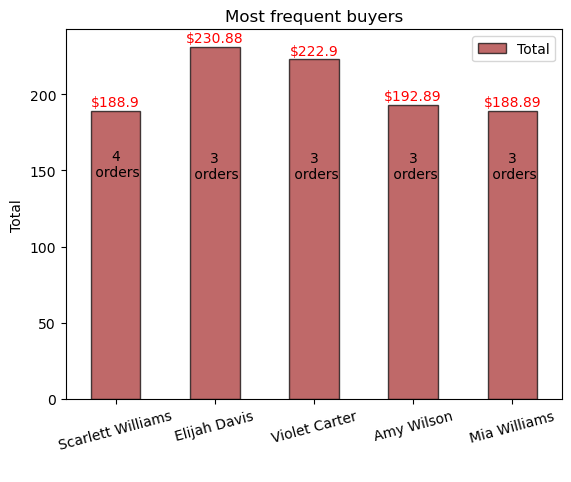

In [20]:
top_buy_count_f = top_buy_count.head(5).copy()
top_buy_count_f['Total'] = top_buy_count_f['Total'].round(2)
ax= top_buy_count_f.plot(kind='bar',x='Name',y='Total',  alpha=0.7, linewidth=1, edgecolor='black', color='brown')
for i, value in enumerate(top_buy_count_f['count']):
    ax.text(i, value + 150, str(value)+'\n orders', ha='center', va='center')
    
for i, value in enumerate(top_buy_count_f['Total']):
    ax.text(i, value + 1,"$"+ str(value), ha='center', va='bottom', color='red')

plt.xticks(rotation=15, ha='center')
plt.title('Most frequent buyers')
plt.xlabel(' ')
plt.ylabel('Total')
plt.legend(['Total'], loc='upper right')
plt.show()

In [21]:
top_buy = top_buy.sort_values('Total',ascending=False)
top_buy.head()

,Name,Total,count,cust_id
66,Elijah Davis,230.88,3,67
80,Violet Carter,222.90,3,81
108,Javier Santos,201.91,2,109
86,Ryan Reily,194.90,2,87
7,Amy Wilson,192.89,3,8


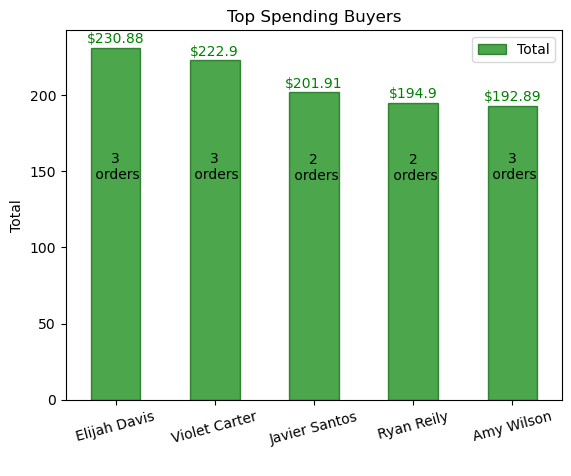

In [22]:
top_buy_f = top_buy.head(5).copy()
top_buy_f['Total'] = top_buy_f['Total'].round(2)
ax= top_buy_f.plot(kind='bar',x='Name',y='Total',  alpha=0.7, linewidth=1, edgecolor='darkgreen', color='green')
for i, value in enumerate(top_buy_f['count']):
    ax.text(i, value + 150, str(value)+'\n orders', ha='center', va='center')
    
for i, value in enumerate(top_buy_f['Total']):
    ax.text(i, value + 1,"$"+ str(value), ha='center', va='bottom', color='green')

plt.xticks(rotation=15, ha='center')
plt.title('Top Spending Buyers')
plt.xlabel(' ')
plt.ylabel('Total')
plt.legend(['Total'], loc='upper right')
plt.show()

### As you can see, Scarlett Williams is our most frequently purchased customer. However, we have customers with a higher consumption in relation to the number of times they have purchased.

# 

### • What are the best-selling products and how much money did they generate?

In [23]:
top_prod = pd.merge(orders,item,on='item_id',how='left')

In [24]:
top_prod['item_price'] = top_prod['item_price'] * top_prod['quantity']
top_prod = top_prod.groupby('item_id',as_index=False)[['item_price','quantity']].sum()

In [25]:
top_prod.rename(columns={'item_price':'total'},inplace=True)

In [26]:
top_prod = pd.merge(top_prod,item,on='item_id',how='left')

In [27]:
top_prod['name'] = top_prod['item_name'] + ' ' +top_prod['item_cat']+ ' ' + top_prod['item_size']
top_prod = top_prod[['item_id','name','quantity','total']]

top_prod = top_prod.sort_values('quantity',ascending=False)

In [28]:
top_prod.head()

,item_id,name,quantity,total
19,it020,Chicken Wings Side Regular,74,813.26
29,it030,Dr Pepper Beverage 2L,54,215.46
23,it024,Pepsi Beverage 2L,41,163.59
9,it010,Donair Pizza Small,39,935.61
24,it025,Diet Pepsi Beverage 2L,36,143.64


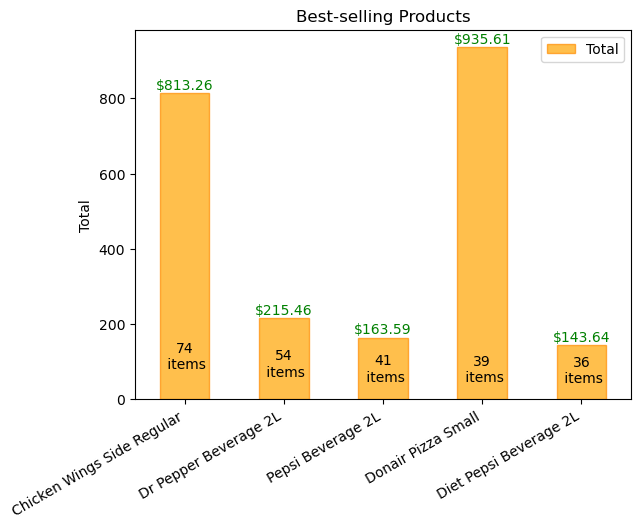

In [29]:
top_prod_f = top_prod.head(5).copy()
top_prod_f['total'] = top_prod_f['total'].round(2)
ax= top_prod_f.plot(kind='bar',x='name',y='total',  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')
for i, value in enumerate(top_prod_f['quantity']):
    ax.text(i, value + 40, str(value)+'\n items', ha='center', va='center')
    
for i, value in enumerate(top_prod_f['total']):
    ax.text(i, value + 3,"$"+ str(value), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Best-selling Products')
plt.xlabel('')
plt.ylabel('Total')
plt.legend(['Total'], loc='upper right')
plt.show()

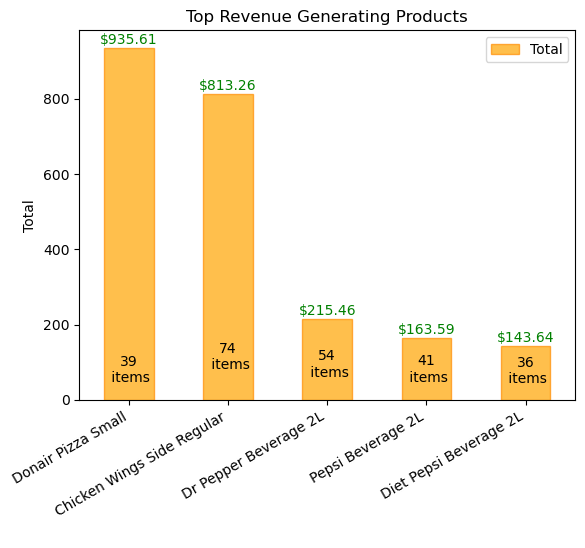

In [30]:
top_prod_m = top_prod.head(5).copy()
top_prod_m = top_prod_m.sort_values('total',ascending=False)
top_prod_m['total'] = top_prod_m['total'].round(2)
ax= top_prod_m.plot(kind='bar',x='name',y='total',  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')
for i, value in enumerate(top_prod_m['quantity']):
    ax.text(i, value + 40, str(value)+'\n items', ha='center', va='center')
    
for i, value in enumerate(top_prod_m['total']):
    ax.text(i, value + 3,"$"+ str(value), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Top Revenue Generating Products')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

### • Which products are usually purchased together?

In [88]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [164]:

basket = (orders.groupby(['order_id', 'item_id'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))


basket_sets = basket.applymap(lambda x: True if x > 0 else False)


frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


sorted_rules = rules.sort_values(by='confidence', ascending=False)
sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
38,"(it018, it022)",(it029),0.064865,1.000000,7.708333
36,"(it029, it022)",(it018),0.064865,0.923077,7.115385
25,"(it005, it020)",(it030),0.054054,0.909091,5.096419
37,"(it029, it018)",(it022),0.064865,0.857143,9.327731
30,"(it024, it014)",(it010),0.054054,0.833333,6.423611
31,"(it024, it010)",(it014),0.054054,0.833333,7.007576
32,"(it014, it010)",(it024),0.054054,0.833333,7.007576
22,(it023),(it028),0.054054,0.769231,6.468531
8,(it012),(it028),0.054054,0.769231,6.468531
21,(it022),(it029),0.070270,0.764706,5.894608


In [165]:
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
sorted_rules['consequents'] = sorted_rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [166]:
mapping_dict = top_prod.set_index('item_id')['name'].to_dict()

In [167]:
def split_elements(elements_str):
    return elements_str.split(', ')
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(split_elements)

In [168]:
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(', '.join)

In [171]:
sorted_rules[['antecedent_1', 'antecedent_2']] = sorted_rules['antecedents'].str.split(', ', expand=True)
sorted_rules['antecedent_1'] = sorted_rules['antecedent_1'].str.strip()
sorted_rules['antecedent_2'] = sorted_rules['antecedent_2'].str.strip()

sorted_rules['antecedents_names_1'] = sorted_rules['antecedent_1'].map(mapping_dict)
sorted_rules['antecedents_names_2'] = sorted_rules['antecedent_2'].map(mapping_dict)
sorted_rules['consequents_names'] = sorted_rules['consequents'].map(mapping_dict)
sorted_rules['antecedents_names_2'] = sorted_rules['antecedents_names_2'].fillna(' ')

In [178]:
def print_association(row):
    antecedent_1 = row['antecedents_names_1']
    antecedent_2 = row['antecedents_names_2']
    consequent = row['consequents_names']

    if antecedent_2 != " ":
        print(f"{antecedent_1}, {antecedent_2} with {consequent}\n")
    else:
        print(f"{antecedent_1} with {consequent}\n")
print("these items are the most commonly purchased together: \n ")
for index, row in sorted_rules.head(10).iterrows():
    print_association(row)

these items are the most commonly purchased together: 
 
Chicken Bacon Ranch Pizza Large, Chocolate Brownie Dessert Regular with Ginger Ale Beverage 2L

Ginger Ale Beverage 2L, Chocolate Brownie Dessert Regular with Chicken Bacon Ranch Pizza Large

Pepperoni Pizza Medium, Chicken Wings Side Regular with Dr Pepper Beverage 2L

Ginger Ale Beverage 2L, Chicken Bacon Ranch Pizza Large with Chocolate Brownie Dessert Regular

Pepsi Beverage 2L, BBQ Chicken Pizza Medium with Donair Pizza Small

Pepsi Beverage 2L, Donair Pizza Small with BBQ Chicken Pizza Medium

BBQ Chicken Pizza Medium, Donair Pizza Small with Pepsi Beverage 2L

Cheesecake Dessert Regular with Iced Tea Beverage 2L

Donair Pizza Large with Iced Tea Beverage 2L

Chocolate Brownie Dessert Regular with Ginger Ale Beverage 2L



## ⦾ inventory and recipes
### • Which items have the highest stock and which ones need to be resupplied?

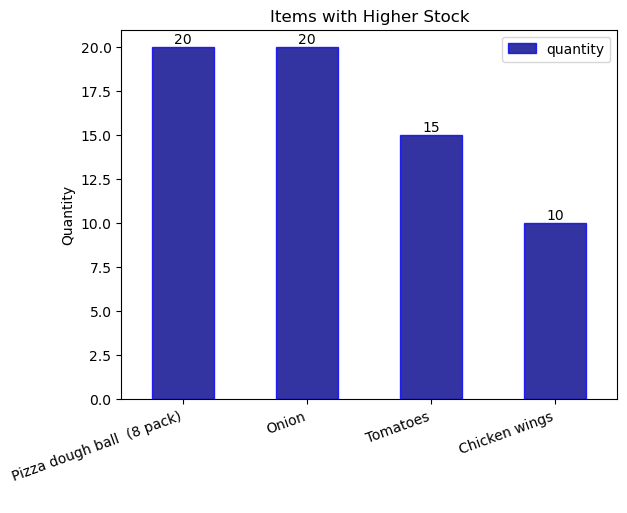

In [34]:
inventory = inventory.sort_values('quantity',ascending=False)
inventory_top = inventory[inventory['quantity'] > 9]
ax = inventory_top.plot(kind='bar',x='ing_name',y='quantity',   alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')
for i, value in enumerate(inventory_top['quantity']):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom', color='black')
plt.xticks(rotation=20, ha='right')

plt.title('Items with Higher Stock')
plt.xlabel(' ')
plt.ylabel('Quantity')

plt.show()

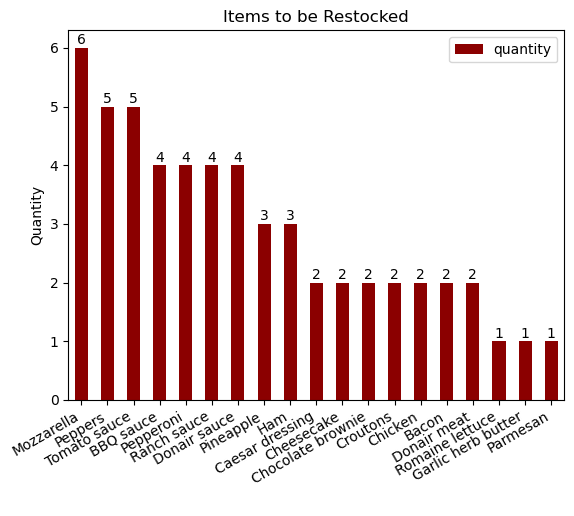

In [35]:
inventory_tail = inventory[inventory['quantity'] <= 9]
ax= inventory_tail.plot(kind='bar',x='ing_name',y='quantity',color='darkred')

for i, value in enumerate(inventory_tail['quantity']):
    ax.text(i, value + 0.01, str(value), ha='center', va='bottom', color='black')
plt.xticks(rotation=30, ha='right')

plt.title('Items to be Restocked')
plt.xlabel(' ')
plt.ylabel('Quantity')

plt.show()

#### Items with higher stock: 

In [36]:
inventory_top[['ing_name','quantity']]

,ing_name,quantity
0,Pizza dough ball (8 pack),20
9,Onion,20
10,Tomatoes,15
15,Chicken wings,10


#### Items to be Restocked

In [37]:
inventory_tail[['ing_name','quantity']]

,ing_name,quantity
4,Mozzarella,6
13,Peppers,5
1,Tomato sauce,5
21,BBQ sauce,4
5,Pepperoni,4
3,Ranch sauce,4
2,Donair sauce,4
7,Pineapple,3
6,Ham,3
17,Caesar dressing,2


### • What are the most commonly used ingredients in the recipes and what is the cost of these as a proportion of the value of the product?

In [38]:
most_common= recipe['ing_id'].value_counts().reset_index()
most_common = most_common.rename(columns={'index':'ing_id','ing_id':'total'})
most_common = pd.merge(most_common,ingredients,on='ing_id',how='left')

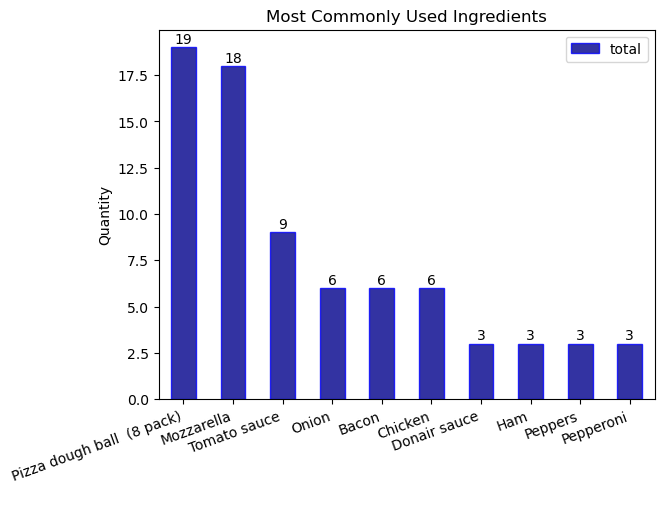

In [39]:
ax = most_common.head(10).plot(kind='bar',x='ing_name',y='total',   alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')
for i, value in enumerate(most_common.head(10)['total']):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom', color='black')
plt.xticks(rotation=20, ha='right')

plt.title('Most Commonly Used Ingredients')
plt.xlabel(' ')
plt.ylabel('Quantity')

plt.show()

In [40]:
cost_prod = pd.merge(recipe,ingredients,on='ing_id',how='outer')
cost_prod['quantity_price'] = cost_prod['ing_price'] / cost_prod['ing_weight'] * cost_prod['quantity']
cost_prod['quantity_price'] = round(cost_prod['quantity_price'],2)
cost_prod = cost_prod.groupby('recipe_id',as_index=False)['quantity_price'].sum()
cost_prod = cost_prod.rename(columns={'recipe_id':'sku','quantity_price':'prod_price'})
cost_prod = pd.merge(cost_prod,item,on='sku',how='outer')
cost_prod['item'] = cost_prod['item_name'] +" "+ cost_prod['item_cat'] +" "+ cost_prod['item_size']

In [41]:
cost_prod_items = cost_prod[['item','prod_price','item_price']]
cost_prod_items = cost_prod_items.sort_values('item_price',ascending=False)


In [42]:
cost_prod.head()

,sku,prod_price,item_id,item_name,item_cat,item_size,item_price,item
0,DESS-CHBR-R,0.28,it022,Chocolate Brownie,Dessert,Regular,8.99,Chocolate Brownie Dessert Regular
1,DESS-CHCA-R,0.28,it023,Cheesecake,Dessert,Regular,8.99,Cheesecake Dessert Regular
2,PIZZ-BBQC-L,4.46,it015,BBQ Chicken,Pizza,Large,35.99,BBQ Chicken Pizza Large
3,PIZZ-BBQC-M,3.86,it014,BBQ Chicken,Pizza,Medium,29.99,BBQ Chicken Pizza Medium
4,PIZZ-BBQC-S,3.28,it013,BBQ Chicken,Pizza,Small,23.99,BBQ Chicken Pizza Small


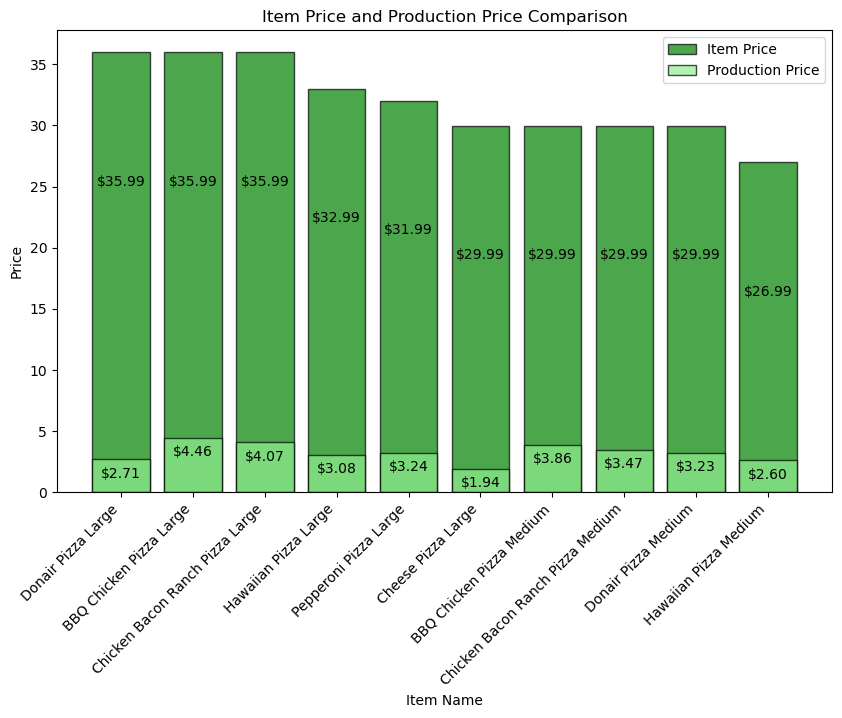

In [43]:
plt.figure(figsize=(10, 6))

plt.bar(cost_prod_items['item'].head(10), cost_prod_items['item_price'].head(10), color='green',alpha=0.7, edgecolor='black', label='Item Price')

plt.bar(cost_prod_items['item'].head(10), cost_prod_items['prod_price'].head(10), color='lightgreen', alpha=0.7, edgecolor='black', label='Production Price')

plt.xlabel('Item Name')
plt.ylabel('Price')
plt.title('Item Price and Production Price Comparison')
plt.legend()

for i, value in enumerate(cost_prod_items['item_price'].head(10)):
    plt.text(i, value -10, f'${value:.2f}', ha='center', va='top', color='black', fontsize=10)

for i, value in enumerate(cost_prod_items['prod_price'].head(10)):
    plt.text(i, value + -0.6, f'${value:.2f}', ha='center', va='top', color='black', fontsize=10)


plt.xticks(rotation=45, ha='right')

plt.show()

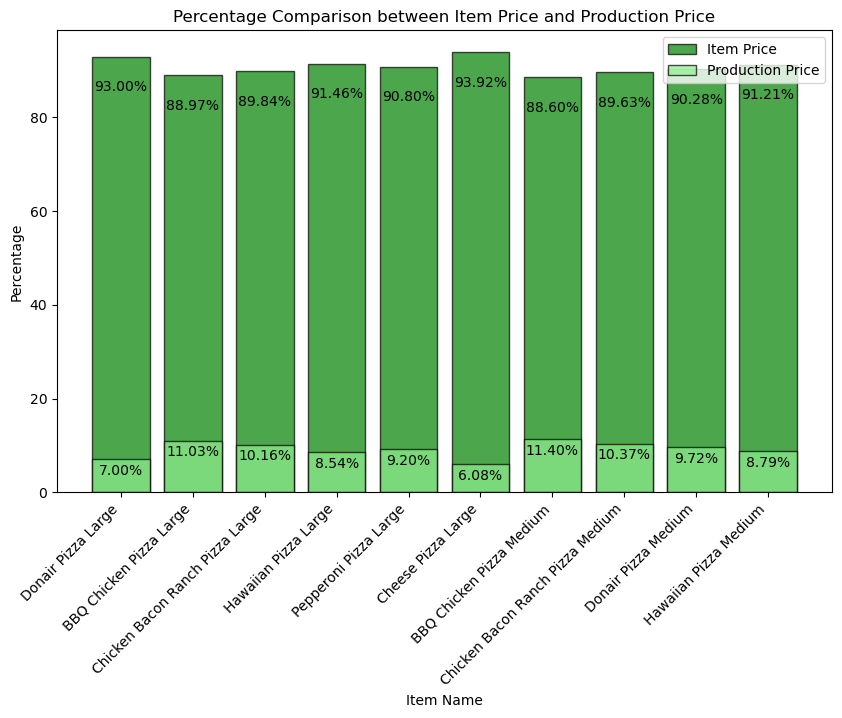

In [44]:
total_price = cost_prod_items['item_price'].head(10) + cost_prod_items['prod_price'].head(10)
item_percentages = (cost_prod_items['item_price'].head(10) / total_price) * 100
prod_percentages = (cost_prod_items['prod_price'].head(10) / total_price) * 100

plt.figure(figsize=(10, 6))

plt.bar(cost_prod_items['item'].head(10), item_percentages, color='green', alpha=0.7, edgecolor='black', label='Item Price')

plt.bar(cost_prod_items['item'].head(10), prod_percentages, color='lightgreen', alpha=0.7, edgecolor='black', label='Production Price')

plt.xlabel('Item Name')
plt.ylabel('Percentage')
plt.title('Percentage Comparison between Item Price and Production Price')
plt.legend()


for i, value in enumerate(item_percentages):
    plt.text(i, value - 5, f'{value:.2f}%', ha='center', va='top', color='black', fontsize=10)

for i, value in enumerate(prod_percentages):
    plt.text(i, value - 4, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)


plt.xticks(rotation=45, ha='right')


plt.show()

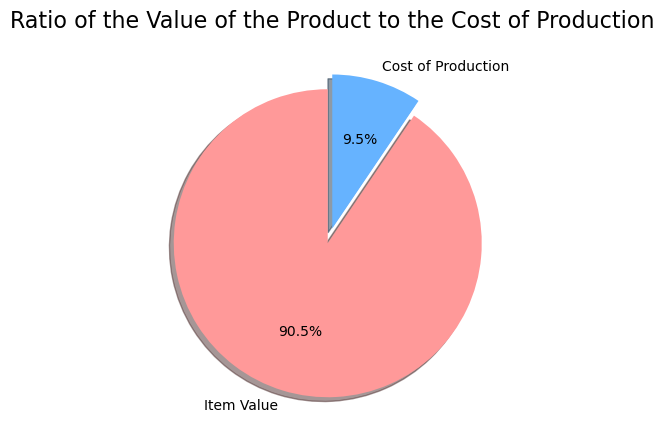

In [45]:
filter_beverage = cost_prod_items['item'].str.contains('2L', case=False)

cost_prod_items = cost_prod_items[~filter_beverage]

total_price = cost_prod_items['item_price'].sum()
total_prod = cost_prod_items['prod_price'].sum()


percentage_price = (cost_prod_items['item_price'].sum() / (total_price + total_prod)) * 100
percentage_prod = (cost_prod_items['prod_price'].sum() / (total_price + total_prod)) * 100


labels = ['Item Value', 'Cost of Production']
sizes = [percentage_price, percentage_prod]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 


plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)


plt.title('Ratio of the Value of the Product to the Cost of Production', fontsize=16)


plt.show()

#### This high profit margin indicates that it is possible to sustain the business in the long term by following marketing and pricing strategies such as discounts or promotions, although maintenance and personnel costs must also be taken into account.

## ⦾ Staff performance
### • How does staff performance vary on different days of the week and shifts?

In [46]:
performance = orders[['order_id','created_at','delivery']]
performance = performance.drop_duplicates(subset=['order_id'])
performance['created_at'] = pd.to_datetime(performance['created_at'])
performance['day'] = performance['created_at'].dt.day_name()
performance['hour'] = performance['created_at'].dt.strftime('%H:%M')

In [47]:
performance['hour'] = pd.to_datetime(performance['hour']).dt.time
shift['start_time'] = pd.to_datetime(shift['start_time']).dt.time
shift['end_time'] = pd.to_datetime(shift['end_time']).dt.time

In [48]:
def asign_shift(row):
    shift_id = shift.loc[(shift['day_of_week'] == row['day']) & (shift['start_time'] <= row['hour']) & (shift['end_time'] > row['hour']), 'shift_id'].values
    return shift_id[0] if len(shift_id) > 0 else None

performance['shift_id'] = performance.apply(asign_shift, axis=1)

In [49]:
performance['date'] = performance['created_at'].dt.date
performance = performance.drop(columns=['created_at'])

In [50]:
performance['date'] = pd.to_datetime(performance['date'])
rota['date'] = pd.to_datetime(rota['date'])
performance = pd.merge(performance,rota,on=['date','shift_id'], how='left')

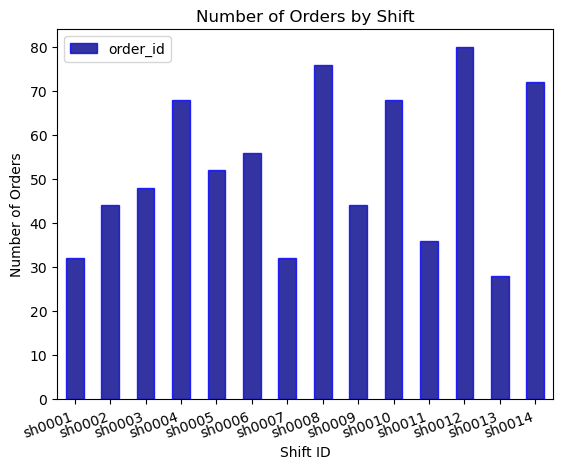

In [51]:
order_counts = performance.groupby('shift_id')['order_id'].count().reset_index()

ax = order_counts.plot(kind='bar', x='shift_id', y='order_id', alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')

plt.xticks(rotation=20, ha='right')
plt.xlabel('Shift ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Shift')
plt.show()

####  as can be seen, the afternoon shifts have a higher demand for purchase orders (the even shifts).

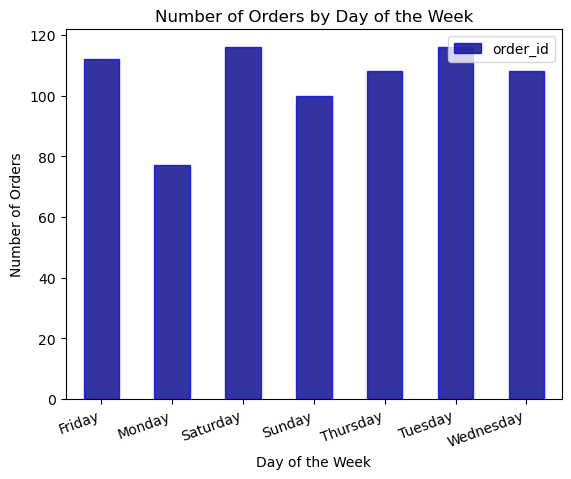

In [52]:
order_counts = performance.groupby('day')['order_id'].count().reset_index()

ax = order_counts.plot(kind='bar', x='day', y='order_id', alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')

plt.xticks(rotation=20, ha='right')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of the Week')
plt.show()

#### Mondays are the days with the lowest sales. This data will be useful to generate a complete analysis of costs and revenues of the pizzeria.

### • What are the labor costs per shift?

In [53]:
cpf = performance[performance['shift_id']=='sh0001']

In [54]:
cpf = pd.merge(rota,staff,on='staff_id',how='outer')

In [55]:
cpf = cpf[(cpf['rota_id'] == 'ro0001') & (cpf['shift_id'] == 'sh0011') & (cpf['date'] == '2024-01-13')]

In [56]:
shift_dur = datetime.combine(datetime.min, shift['end_time'].iloc[0]) - datetime.combine(datetime.min, shift['start_time'].iloc[0])

In [57]:
result = shift_dur.total_seconds() / 3600

In [58]:
cpf['total_per_shift'] = round(cpf['hourly_rate'] * result,2)

In [84]:
total_cost = round(cpf['total_per_shift'].sum(),2)

In [85]:
print(f"Total labor costs per shift  ${total_cost}")
print(f"Total labor costs per day ${total_cost *2}")
print(f"Total labor costs per week ${total_cost *14}")
print(f"Total labor costs per month ${total_cost *60}")

Total labor costs per shift  $406.5
Total labor costs per day $813.0
Total labor costs per week $5691.0
Total labor costs per month $24390.0


## ⦾ Pizzeria profitability
### • Total income in the pizzeria 

In [61]:
total_income = top_prod['total'].sum()

In [62]:
print(f"the total income of the pizzeria is {round(total_income,2)}")

the total income of the pizzeria is 10450.27


### • Daily, weekly and total profits

In [63]:
profits = pd.merge(pd.merge(orders,item,on='item_id',how='left'),cost_prod,on='item_id',how='left')
profits['prod_price'] = profits['prod_price'].fillna(0)
profits['total_price'] = (profits['item_price_x'] - profits['prod_price']) * profits['quantity']
profits = profits[['created_at','total_price']]

In [64]:
profits['created_at'] = pd.to_datetime(profits['created_at'])
profits['day_of_week'] = profits['created_at'].dt.day_name()
profits['week_number'] = profits['created_at'].dt.isocalendar().week

In [65]:
profits['week_number'] = profits['week_number'] - 1
profits['created_at'] = profits['created_at'].dt.date

In [66]:
profits_daily = profits.groupby('created_at',as_index=False)['total_price'].sum()
profits_weekly = profits.groupby('week_number',as_index=False)['total_price'].sum()

In [67]:
profits_daily['daily_labor_cost'] = total_cost *2
profits_weekly['weekly_labor_cost'] = total_cost * 14

In [68]:
profits_daily = profits_daily.drop_duplicates('total_price')

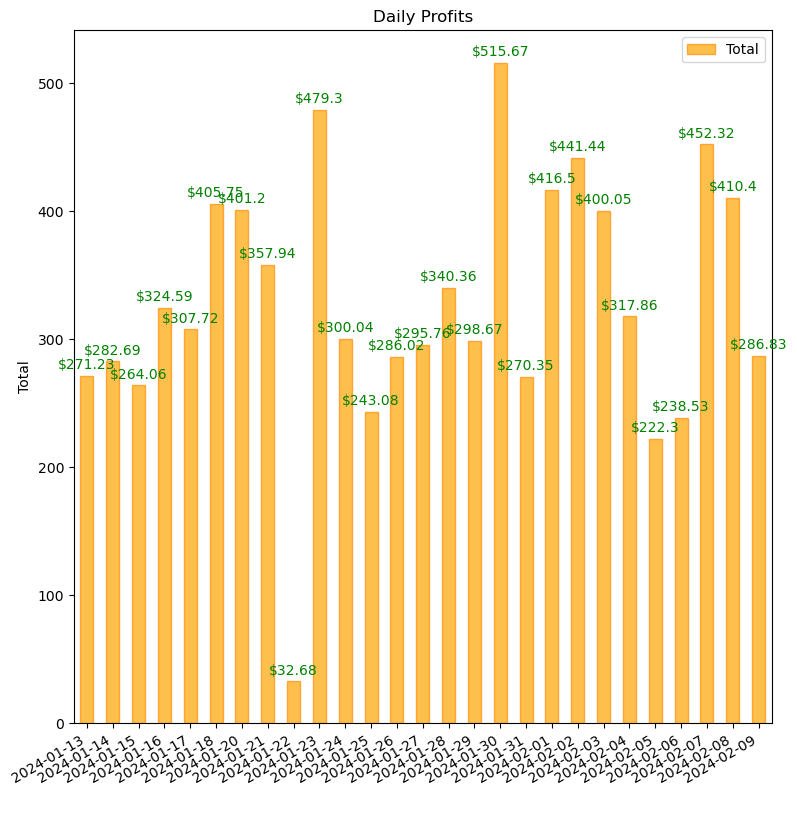

In [69]:
fig,ax= plt.subplots(figsize=(9,9))
profits_daily.plot(kind='bar',x='created_at',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(profits_daily['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Daily Profits')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

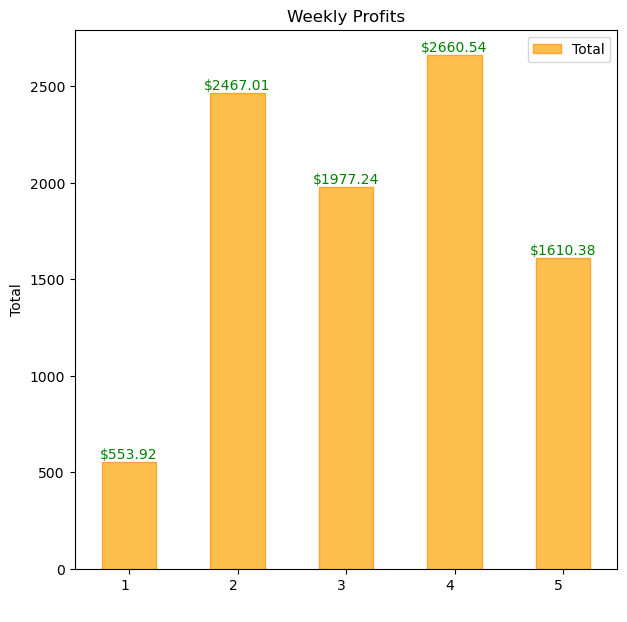

In [70]:
fig,ax= plt.subplots(figsize=(7,7))
profits_weekly.plot(kind='bar',x='week_number',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(profits_weekly['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=0, ha='right')
plt.title('Weekly Profits')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

### The profit obtained from the sale of the products can be seen by deducting the cost of production of the products. However, the personnel cost per day is much higher than the profit obtained. 

### From the data analyzed, we will see if the following decisions can reduce the gap between the profit of the store and the salary costs: 
### -Reduce the working days and open the pizzeria only on days when there is usually more demand.
### - Reduce the hours to have only one shift instead of two per day.

### first, let's see what the peak sales hours are.

In [71]:
reduced = pd.merge(pd.merge(orders,item,on='item_id',how='left'),cost_prod,on='item_id',how='left')

In [72]:
reduced['prod_price'] = reduced['prod_price'].fillna(0)
reduced['total_price'] = (reduced['item_price_x'] - reduced['prod_price']) * reduced['quantity']
reduced['created_at'] = pd.to_datetime(reduced['created_at'])
reduced['day_of_week'] = reduced['created_at'].dt.day_name()
reduced['week_number'] = reduced['created_at'].dt.isocalendar().week
reduced['week_number'] = reduced['week_number'] - 1
reduced['date'] = reduced['created_at'].dt.date
reduced['time'] = reduced['created_at'].dt.time

In [73]:
reduced= reduced[['order_id','date','time','total_price','day_of_week','week_number']]

In [74]:
reduced['hour'] = reduced['time'].apply(lambda x: x.hour)

In [75]:
reduced_h = reduced.groupby('hour',as_index=False)['total_price'].sum()

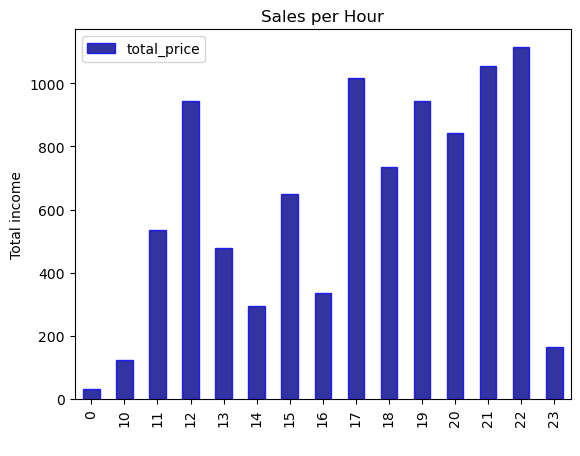

In [76]:
ax = reduced_h.plot(kind='bar',x='hour',y='total_price',   alpha=0.8, linewidth=1, edgecolor='blue', color='darkblue')

plt.title('Sales per Hour')
plt.xlabel(' ')
plt.ylabel('Total income')

plt.show()

### Although a peak sales hour is lost for the pizzeria, it is possible to reduce one shift and only open during the afternoon and have the hours from 5pm to 11pm.
### Also, as we saw in a previous graph, Mondays are the days with the least sales, so this day can be removed to evaluate how it affects the salary costs of the employees.

## Let's see the results of these measures

In [77]:
reduced = reduced.loc[reduced['day_of_week'] != 'Monday']
reduced['time'] = pd.to_datetime(reduced['time'], format='%H:%M:%S').dt.time
reduced = reduced.loc[(reduced['time'] >= pd.to_datetime('17:00:00').time()) & (reduced['time'] <= pd.to_datetime('23:00:00').time())]

In [78]:
reduced_daily = reduced.groupby('date',as_index=False)['total_price'].sum()
reduced_weekly = reduced.groupby('week_number',as_index=False)['total_price'].sum()

In [79]:
reduced_daily = reduced_daily.drop_duplicates('total_price')

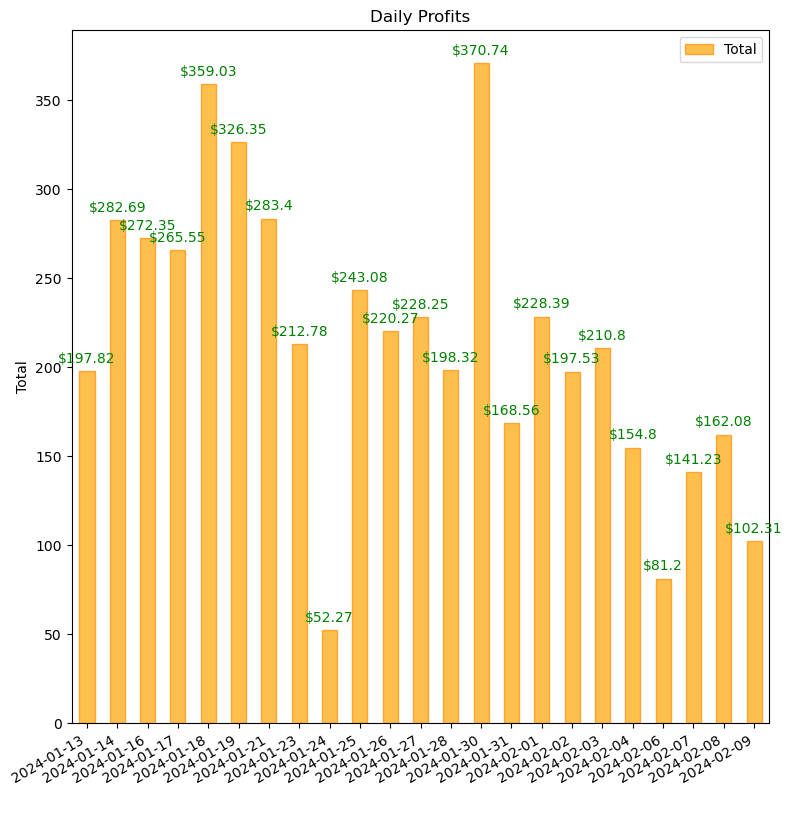

In [80]:
fig,ax= plt.subplots(figsize=(9,9))
reduced_daily.plot(kind='bar',x='date',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(reduced_daily['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=30, ha='right')
plt.title('Daily Profits')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

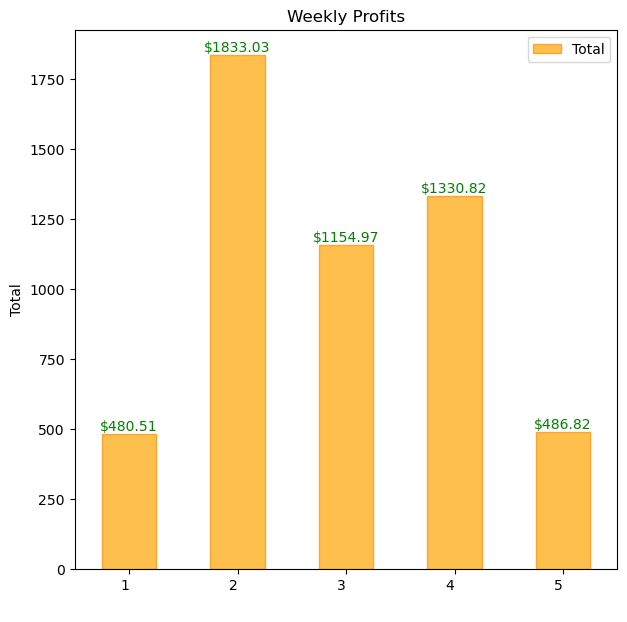

In [81]:
fig,ax= plt.subplots(figsize=(7,7))
reduced_weekly.plot(kind='bar',x='week_number',y='total_price', ax=ax,  alpha=0.7, linewidth=1, edgecolor='darkorange', color='orange')

for i, value in enumerate(reduced_weekly['total_price']):
    ax.text(i, value + 3,"$"+ str(round(value,2)), ha='center', va='bottom', color='green')

plt.xticks(rotation=0, ha='right')
plt.title('Weekly Profits')
plt.legend(['Total'], loc='upper right')
plt.xlabel(' ')
plt.ylabel('Total')
plt.show()

#### the first week has only two days out of six and the last week four out of six.

In [86]:
cpf['total_per_shift'] = round(cpf['hourly_rate'] * 6,2)

total_cost_red = round(cpf['total_per_shift'].sum(),2)

print(f"Total labor costs per shift/day ${total_cost_red}")


print(f"Total labor costs per week ${total_cost_red *7}")
print(f"Total labor costs per month ${total_cost_red *30}")

Total labor costs per shift/day $406.5
Total labor costs per week $2845.5
Total labor costs per month $12195.0


In [83]:
print(f"Total income of the pizzeria with reduced costs: {round(reduced['total_price'].sum(),2)} ")

Total income of the pizzeria with reduced costs: 5286.15 


## Although the gap between total revenues and employee costs has narrowed, it is still more than double and the pizzeria is not profitable. 

## Considering the competition's prices, it is worth considering raising prices or reducing the number of employees if possible. At the same time, look for marketing strategies to increase sales, such as offering promotions for products that are sold together more frequently, as we saw in one of the previous points. 